In [2]:
# Import all the Necessary Packages
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import os

from ydata_profiling import ProfileReport

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor

import scipy.stats as stats
from scipy.stats import chi2_contingency
from tqdm import tqdm

plt.style.use('dark_background')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
# Find and set the working directory for this project
os.chdir(r'C:\Users\jdrel\OneDrive\Documents\Data_Science\Springboard\Network Intrusions')

In [6]:
# Import the data and see what it looks like
data = pd.read_csv('./data/raw/kddcup.data_10_percent')
data.head()

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,0.5,1,0.6,0.7,0.8,0.9,0.10,0.12,0.13,0.14,0.15,0.16,8,8.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,9,9.1,1.00.1,0.00.6,0.11,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [7]:
# I copy and pasted the column names from the website into this list
data.columns = ["duration", "protocol_type", "service", "flag", "src_bytes",
                "dst_bytes", "land", "wrong_fragment", "urgent", "hot",
                "num_failed_logins", "logged_in", "num_compromised",
                "root_shell", "su_attempted", "num_root", "num_file_creations",
                "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
                "is_guest_login", "count", "srv_count", "serror_rate","srv_serror_rate",
                "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
                "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
                "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", 
                "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "labels"]
data.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.


In [8]:
# Use the drop methods to get rid of the constants
data = data.drop(columns = ['num_outbound_cmds', 'is_host_login'], axis = 1)

In [9]:
# Only use the X data so that it is easy to test for multicollinearity
X_data = data.drop('labels', axis = 1)

# Find the categorical columns that need to be made numerical for analysis
cat_cols = list(X_data.select_dtypes(include = 'object').columns)

# Find all of the binary columns as they act as categorical columns
bi_cols = [col for col in X_data.columns if np.array_equal(np.sort(X_data[col].unique()), np.array([0,1]))]

# Combine the columns into one list of non-numerical columns
cat_cols.extend(bi_cols)

# Add in 'su_attempted' since it is no continuous relationship between the numbers
cat_cols.append('su_attempted')

# Separate out the numerical columns from the categorical columns
X_num_data = X_data.drop(cat_cols, axis = 1)

In [10]:
# Create the scaler object
scaler = StandardScaler()
# fit the scaler to the dataset
scaler.fit(X_num_data)
# Scale the dataset
x_num_data_scaled = pd.DataFrame(scaler.transform(X_num_data), columns = X_num_data.columns)

## **<center>Multicolinearity**

In [8]:
# Function to get rid of all the diagonals in correlation heatmaps
def zero_diagonal_heatmap(dfx, min = 0, max = None, color_map = None, threshhold = 0):
    # give the max a base value
    if max is None:
        max = len(dfx)
    # Create a numpy matrix that is easy to manipulate
    cm = np.matrix(abs(dfx.iloc[:,min:max].corr()))
    # Create a loop that replaces all the diagonal values with 0
    for i in range(len(cm)):
        # Loop thorough the other axis of values
        for j in range(len(cm)):
            # All diagonal values happen when i == j
            if i == j:
                # set the diagonal value equal to 0
                cm[i,j] = 0
    df_cm = pd.DataFrame(cm, columns = list(dfx.columns)[min:max], index = list(dfx.columns)[min:max])
    # Make the plot bigger
    plt.figure(figsize=(12, 8))
    # Plot the heatmap
    ax = sns.heatmap(df_cm, cmap = color_map, center = threshhold, vmin = 0, vmax = 1);

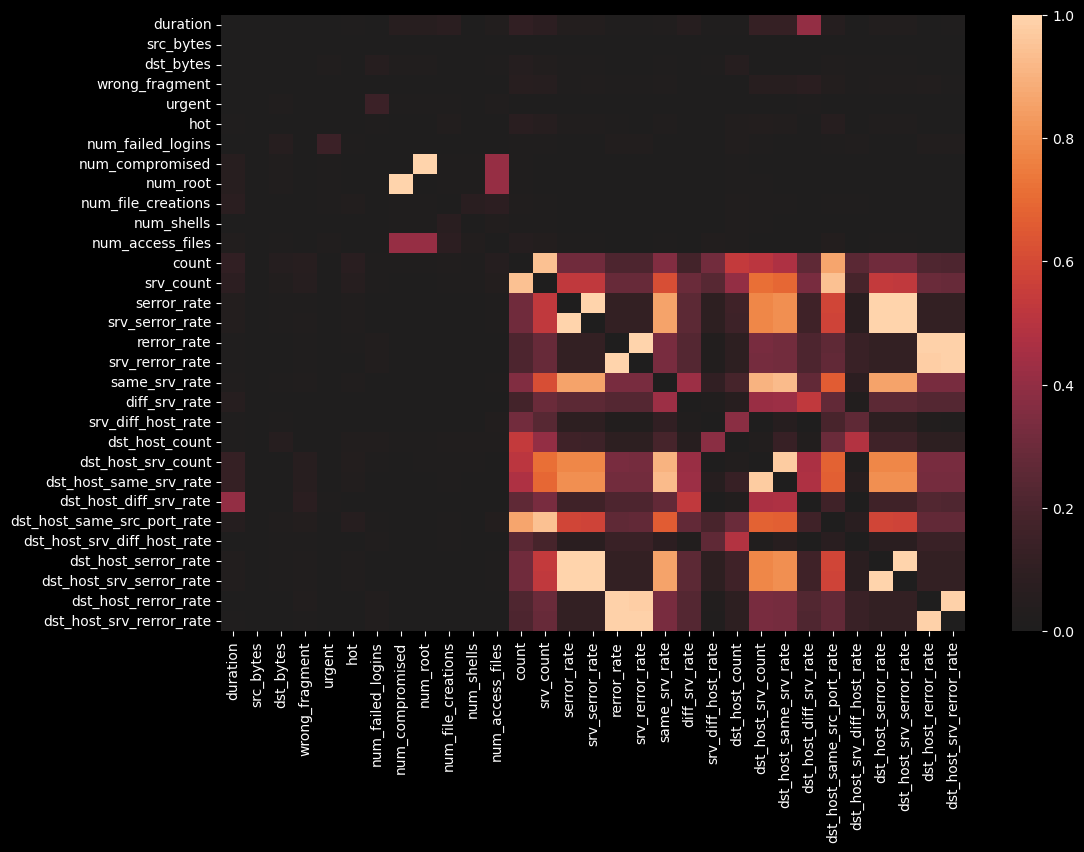

In [9]:
zero_diagonal_heatmap(x_num_data_scaled)

#### $\\χ^2$

In [10]:
cat_cols

['protocol_type',
 'service',
 'flag',
 'land',
 'logged_in',
 'root_shell',
 'is_guest_login',
 'su_attempted']

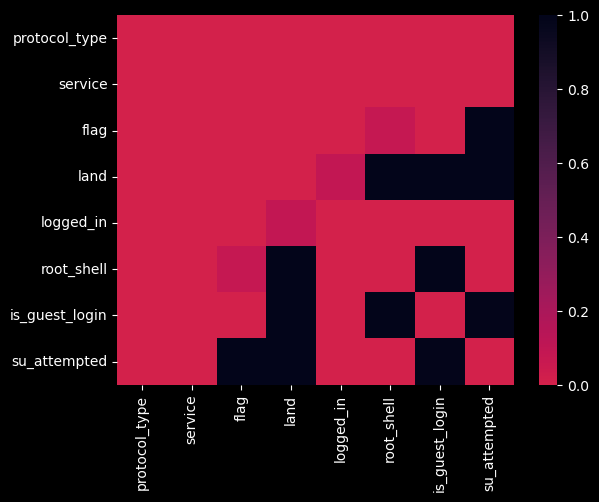

In [26]:
# create an empty dictionary to store the results
chi_p = {}

# loop through each feature and perform the chi-square test
for feature1 in cat_cols:
    # Initialize a list to store the p-values in
    p_vals = []
    # Iterate through all of features to get each element compared to each other
    for feature2 in cat_cols:       
        # create a contingency table for the feature and the target variable
        table = pd.crosstab(X_data[feature1], X_data[feature2])
        # perform the chi-square test and get the p-value
        _, p, _, _ = chi2_contingency(table)
        # Add the p_values to the list for feature 1
        p_vals.append(p)
    # store the p-value in the results dictionary
    chi_p[feature1] = p_vals

chi_p_df = pd.DataFrame(chi_p, index = cat_cols)

# print the results
sns.heatmap(pd.DataFrame(chi_p, index = cat_cols), center = 0.05, cmap = 'rocket_r');

In [78]:
data['land'].value_counts()

0    493998
1        22
Name: land, dtype: int64

In [32]:
for col in cat_cols:
    print(f'{col}: {len(data[col].unique())}')

protocol_type: 3
service: 66
flag: 11
land: 2
logged_in: 2
root_shell: 2
is_guest_login: 2
su_attempted: 3


In [33]:
for col in cat_cols:
    print(data[col].value_counts())

icmp    283602
tcp     190064
udp      20354
Name: protocol_type, dtype: int64
ecr_i      281400
private    110893
http        64292
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
pm_dump         1
tftp_u          1
red_i           1
Name: service, Length: 66, dtype: int64
SF        378439
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64
0    493998
1        22
Name: land, dtype: int64
0    420784
1     73236
Name: logged_in, dtype: int64
0    493965
1        55
Name: root_shell, dtype: int64
0    493335
1       685
Name: is_guest_login, dtype: int64
0    494008
1         6
2         6
Name: su_attempted, dtype: int64


In [60]:
ct_o = pd.crosstab(data["protocol_type"], data["service"], margins=True)
ct_o

service,IRC,X11,Z39_50,auth,bgp,courier,csnet_ns,ctf,daytime,discard,domain,domain_u,echo,eco_i,ecr_i,efs,exec,finger,ftp,ftp_data,gopher,hostnames,http,http_443,imap4,iso_tsap,klogin,kshell,ldap,link,login,mtp,name,netbios_dgm,netbios_ns,netbios_ssn,netstat,nnsp,nntp,ntp_u,other,pm_dump,pop_2,pop_3,printer,private,red_i,remote_job,rje,shell,smtp,sql_net,ssh,sunrpc,supdup,systat,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois,All
protocol_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
icmp,0,0,0,0,0,0,0,0,0,0,0,0,0,1642,281400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7,0,14,538,0,0,0,0,283602
tcp,43,11,92,328,106,108,126,97,103,116,116,0,112,0,0,103,99,670,798,4721,117,104,64292,99,117,115,106,98,101,102,104,107,98,99,102,107,95,105,108,0,1639,1,101,202,109,102381,0,120,111,112,9723,110,105,107,105,115,513,0,0,157,0,0,106,106,106,110,190064
udp,0,0,0,0,0,0,0,0,0,0,0,5863,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,380,5598,0,0,0,0,8512,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,20354
All,43,11,92,328,106,108,126,97,103,116,116,5863,112,1642,281400,103,99,670,798,4721,117,104,64292,99,117,115,106,98,101,102,104,107,98,99,102,107,95,105,108,380,7237,1,101,202,109,110893,1,120,111,112,9723,110,105,107,105,115,513,1,7,157,14,538,106,106,106,110,494020


In [52]:
ct_service = np.array(ct.iloc[3,:]).reshape(1,67)
ct_protocol_type = np.array(ct.iloc[:-1,-1]).reshape(3,1)
ct_expect = (ct_protocol_type @ ct_service)/494020

In [58]:
ct_e = round(pd.DataFrame(ct_expect, columns = ct.columns, index = ct.index[:-1]),2)

In [61]:
ct_e

service,IRC,X11,Z39_50,auth,bgp,courier,csnet_ns,ctf,daytime,discard,domain,domain_u,echo,eco_i,ecr_i,efs,exec,finger,ftp,ftp_data,gopher,hostnames,http,http_443,imap4,iso_tsap,klogin,kshell,ldap,link,login,mtp,name,netbios_dgm,netbios_ns,netbios_ssn,netstat,nnsp,nntp,ntp_u,other,pm_dump,pop_2,pop_3,printer,private,red_i,remote_job,rje,shell,smtp,sql_net,ssh,sunrpc,supdup,systat,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois,All
protocol_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
icmp,24.69,6.31,52.81,188.29,60.85,62.00,72.33,55.68,59.13,66.59,66.59,3365.77,64.30,942.62,161543.26,59.13,56.83,384.63,458.11,2710.18,67.17,59.70,36908.10,56.83,67.17,66.02,60.85,56.26,57.98,58.56,59.70,61.43,56.26,56.83,58.56,61.43,54.54,60.28,62.00,218.15,4154.54,0.57,57.98,115.96,62.57,63660.33,0.57,68.89,63.72,64.30,5581.68,63.15,60.28,61.43,60.28,66.02,294.50,0.57,4.02,90.13,8.04,308.85,60.85,60.85,60.85,63.15,283602.0
tcp,16.54,4.23,35.40,126.19,40.78,41.55,48.48,37.32,39.63,44.63,44.63,2255.67,43.09,631.73,108262.84,39.63,38.09,257.77,307.01,1816.31,45.01,40.01,24735.02,38.09,45.01,44.24,40.78,37.70,38.86,39.24,40.01,41.17,37.70,38.09,39.24,41.17,36.55,40.40,41.55,146.20,2784.29,0.38,38.86,77.72,41.94,42663.79,0.38,46.17,42.70,43.09,3740.72,42.32,40.40,41.17,40.40,44.24,197.37,0.38,2.69,60.40,5.39,206.98,40.78,40.78,40.78,42.32,190064.0
udp,1.77,0.45,3.79,13.51,4.37,4.45,5.19,4.00,4.24,4.78,4.78,241.56,4.61,67.65,11593.89,4.24,4.08,27.60,32.88,194.51,4.82,4.28,2648.88,4.08,4.82,4.74,4.37,4.04,4.16,4.20,4.28,4.41,4.04,4.08,4.20,4.41,3.91,4.33,4.45,15.66,298.17,0.04,4.16,8.32,4.49,4568.88,0.04,4.94,4.57,4.61,400.60,4.53,4.33,4.41,4.33,4.74,21.14,0.04,0.29,6.47,0.58,22.17,4.37,4.37,4.37,4.53,20354.0


In [63]:
(ct_o.iloc[:-1,:]-ct_e)

service,IRC,X11,Z39_50,auth,bgp,courier,csnet_ns,ctf,daytime,discard,domain,domain_u,echo,eco_i,ecr_i,efs,exec,finger,ftp,ftp_data,gopher,hostnames,http,http_443,imap4,iso_tsap,klogin,kshell,ldap,link,login,mtp,name,netbios_dgm,netbios_ns,netbios_ssn,netstat,nnsp,nntp,ntp_u,other,pm_dump,pop_2,pop_3,printer,private,red_i,remote_job,rje,shell,smtp,sql_net,ssh,sunrpc,supdup,systat,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois,All
protocol_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
icmp,-24.69,-6.31,-52.81,-188.29,-60.85,-62.00,-72.33,-55.68,-59.13,-66.59,-66.59,-3365.77,-64.30,699.38,119856.74,-59.13,-56.83,-384.63,-458.11,-2710.18,-67.17,-59.70,-36908.10,-56.83,-67.17,-66.02,-60.85,-56.26,-57.98,-58.56,-59.70,-61.43,-56.26,-56.83,-58.56,-61.43,-54.54,-60.28,-62.00,-218.15,-4154.54,-0.57,-57.98,-115.96,-62.57,-63660.33,0.43,-68.89,-63.72,-64.30,-5581.68,-63.15,-60.28,-61.43,-60.28,-66.02,-294.50,-0.57,2.98,-90.13,5.96,229.15,-60.85,-60.85,-60.85,-63.15,0.0
tcp,26.46,6.77,56.60,201.81,65.22,66.45,77.52,59.68,63.37,71.37,71.37,-2255.67,68.91,-631.73,-108262.84,63.37,60.91,412.23,490.99,2904.69,71.99,63.99,39556.98,60.91,71.99,70.76,65.22,60.30,62.14,62.76,63.99,65.83,60.30,60.91,62.76,65.83,58.45,64.60,66.45,-146.20,-1145.29,0.62,62.14,124.28,67.06,59717.21,-0.38,73.83,68.30,68.91,5982.28,67.68,64.60,65.83,64.60,70.76,315.63,-0.38,-2.69,96.60,-5.39,-206.98,65.22,65.22,65.22,67.68,0.0
udp,-1.77,-0.45,-3.79,-13.51,-4.37,-4.45,-5.19,-4.00,-4.24,-4.78,-4.78,5621.44,-4.61,-67.65,-11593.89,-4.24,-4.08,-27.60,-32.88,-194.51,-4.82,-4.28,-2648.88,-4.08,-4.82,-4.74,-4.37,-4.04,-4.16,-4.20,-4.28,-4.41,-4.04,-4.08,-4.20,-4.41,-3.91,-4.33,-4.45,364.34,5299.83,-0.04,-4.16,-8.32,-4.49,3943.12,-0.04,-4.94,-4.57,-4.61,-400.60,-4.53,-4.33,-4.41,-4.33,-4.74,-21.14,0.96,-0.29,-6.47,-0.58,-22.17,-4.37,-4.37,-4.37,-4.53,0.0


In [65]:
chi_presum = ((ct_o.iloc[:-1,:]-ct_e)**2)/ct_e

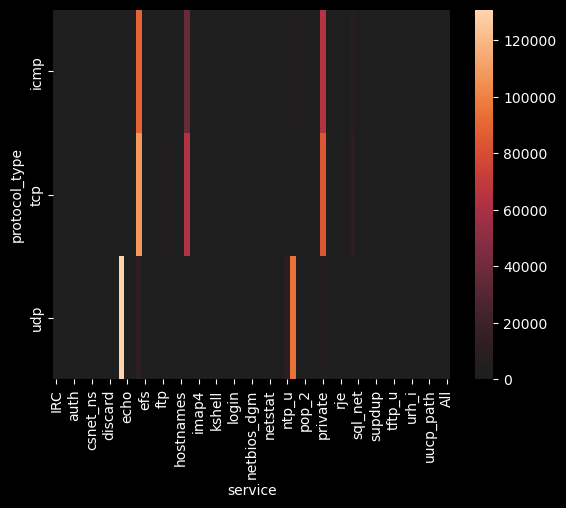

In [72]:
sns.heatmap(abs(chi_presum), center = 4);

<Axes: xlabel='service', ylabel='protocol_type'>

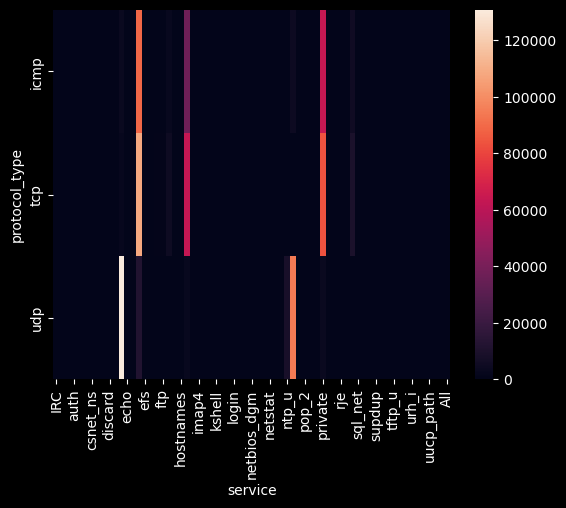

In [66]:
sns.heatmap(chi_presum)

In [69]:
# create an empty dictionary to store the results
chi_p = {}

# Try the data without ecr_i as that was 
no_ecri = data.loc[data['service'] != 'ecr_i',:]
    
# create a contingency table for the feature and the target variable
table = pd.crosstab(no_ecri['service'], no_ecri['protocol_type'])
# perform the chi-square test and get the p-value
_, p, _, _ = chi2_contingency(table)

p

0.0

In [73]:
data['flag'].value_counts()

SF        378439
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [77]:
# create a contingency table for the feature and the target variable
ct_flag = pd.crosstab(no_ecri['service'], no_ecri['flag'], margins = True)
ct_flag

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH,All
service,,,,,,,,,,,,
IRC,0,1,5,0,24,0,4,0,0,9,0,43
X11,0,2,0,0,0,1,0,0,0,8,0,11
Z39_50,0,18,0,0,1,73,0,0,0,0,0,92
auth,0,21,0,0,0,87,0,0,0,220,0,328
bgp,0,24,0,0,0,82,0,0,0,0,0,106
courier,0,19,0,0,1,88,0,0,0,0,0,108
csnet_ns,0,24,0,0,3,99,0,0,0,0,0,126
ctf,0,18,0,0,0,78,0,0,0,0,1,97
daytime,0,0,14,0,0,89,0,0,0,0,0,103


In [ ]:
ct_ = np.array(ct.iloc[3,:]).reshape(1,67)
ct_protocol_type = np.array(ct.iloc[:-1,-1]).reshape(3,1)
ct_expect = (ct_protocol_type @ ct_service)/494020

In [ ]:
services = pd.concat([X_num_data, data['service']], axis = 1).groupby('service')
results = []
for col in X_num_data:
    if col == 'service':
        continue
    for 

In [18]:
services = pd.concat([x_num_data_scaled, data['service']], axis = 1).groupby('service')
results = []
dict = {}
for service in data['service']:
    
    for col in services:
        if col == 'service':
            continue
        dict.update({service: services.get_group(f'{service}')[col]})
    f, p = stats.f_oneway(dict.values())
    results.append((col, f, p))


InvalidIndexError: ('IRC',          duration  src_bytes  dst_bytes  wrong_fragment    urgent       hot  \
52752   36.106179   0.000640   0.231522        -0.04772 -0.002571 -0.044136   
74483    8.628825  -0.001936   0.124076        -0.04772 -0.002571 -0.044136   
74486   -0.067792  -0.002980  -0.025742        -0.04772 -0.002571 -0.044136   
74498    0.268487  -0.002928   0.011455        -0.04772 -0.002571 -0.044136   
74499   -0.067792  -0.003062  -0.026287        -0.04772 -0.002571 -0.044136   
76815   17.126218  -0.001078   0.090390        -0.04772 -0.002571 -0.044136   
76816   21.463930  -0.001256   0.262242        -0.04772 -0.002571 -0.044136   
76817   15.334616  -0.000429   0.243719        -0.04772 -0.002571 -0.044136   
76818   -0.067792  -0.003062  -0.026287        -0.04772 -0.002571 -0.044136   
76819   -0.067792  -0.003062  -0.026287        -0.04772 -0.002571  1.234469   
78652   13.346616  -0.001338   0.326134        -0.04772 -0.002571 -0.044136   
78654   -0.067792  -0.002987  -0.025742        -0.04772 -0.002571 -0.044136   
78658   11.087333  -0.001581   0.213332        -0.04772 -0.002571 -0.044136   
83121   -0.067792  -0.002978  -0.025772        -0.04772 -0.002571 -0.044136   
83132    7.211651  -0.001230   0.210093        -0.04772 -0.002571 -0.044136   
91928   -0.067792  -0.003062  -0.026287        -0.04772 -0.002571 -0.044136   
104058  -0.067792   0.039522   1.339421        -0.04772 -0.002571 -0.044136   
104061  -0.067792   0.034640   1.183822        -0.04772 -0.002571 -0.044136   
137155  11.225800  -0.002279   0.184215        -0.04772 -0.002571 -0.044136   
141849  41.325562   0.000258   0.282853        -0.04772 -0.002571 -0.044136   
141854  -0.066379  -0.002984  -0.025772        -0.04772 -0.002571 -0.044136   
143506  27.466079   0.000325   0.342569        -0.04772 -0.002571 -0.044136   
146221   0.339134  -0.002716   0.034609        -0.04772 -0.002571 -0.044136   
146225  -0.067792  -0.002988  -0.025772        -0.04772 -0.002571 -0.044136   
146228  16.038258  -0.001249   0.311243        -0.04772 -0.002571 -0.044136   
148571  12.888825  -0.001536   0.138180        -0.04772 -0.002571 -0.044136   
343541  17.718238  -0.001774   0.327133        -0.04772 -0.002571 -0.044136   
343543  18.628169  -0.001184   0.251346        -0.04772 -0.002571 -0.044136   
345430  14.910736  -0.001173   0.273562        -0.04772 -0.002571 -0.044136   
345431  11.624248  -0.001474   0.218991        -0.04772 -0.002571 -0.044136   
347909  13.689960  -0.001832   0.216086        -0.04772 -0.002571 -0.044136   
371717  -0.067792  -0.001232   0.179161        -0.04772 -0.002571 -0.044136   
371718  15.853164  -0.001272   0.274076        -0.04772 -0.002571 -0.044136   
371719  12.366039  -0.001921   0.218961        -0.04772 -0.002571 -0.044136   
371720  10.830179  -0.002190   0.221685        -0.04772 -0.002571 -0.044136   
450899  38.454477  -0.000061   0.243658        -0.04772 -0.002571 -0.044136   
457394   4.979213  -0.002655   0.114663        -0.04772 -0.002571 -0.044136   
457396   3.588885  -0.002549   0.087151        -0.04772 -0.002571 -0.044136   
457406   6.061522  -0.002527   0.112514        -0.04772 -0.002571 -0.044136   
481729  -0.067792  -0.002978  -0.025772        -0.04772 -0.002571 -0.044136   
481732  20.884626  -0.000178   0.272139        -0.04772 -0.002571 -0.044136   
491412  14.724228  -0.000854   0.257793        -0.04772 -0.002571 -0.044136   
491417  -0.067792  -0.002988  -0.025742        -0.04772 -0.002571 -0.044136   

        num_failed_logins  num_compromised  num_root  num_file_creations  \
52752           -0.009782        -0.005679  -0.00564           -0.011232   
74483           -0.009782        -0.005679  -0.00564           -0.011232   
74486           -0.009782        -0.005679  -0.00564           -0.011232   
74498           -0.009782        -0.005679  -0.00564           -0.011232   
74499           -0.009782        -0.005679  -0.00564           -0.011232   
76815           -0.009782        -0.005679  -0.00564           -0.011232   
76816           -0.009782        -0.005679  -0.00564           -0.011232   
76817           -0.009782        -0.005679  -0.00564           -0.011232   
76818           -0.009782        -0.005679  -0.00564           -0.011232   
76819           -0.009782        -0.005679  -0.00564           -0.011232   
78652           -0.009782        -0.005679  -0.00564           -0.011232   
78654           -0.009782        -0.005679  -0.00564           -0.011232   
78658           -0.009782        -0.005679  -0.00564           -0.011232   
83121           -0.009782        -0.005679  -0.00564           -0.011232   
83132           -0.009782        -0.005679  -0.00564           -0.011232   
91928           -0.009782        -0.005679  -0.00564           -0.011232   
104058          -0.009782        -0.005679  -0.00564           -0.011232   
104061          -0.009782        -0.005679  -0.00564           -0.011232   
137155          -0.009782        -0.005679  -0.00564           -0.011232   
141849          -0.009782        -0.005679  -0.00564           -0.011232   
141854          -0.009782        -0.005679  -0.00564           -0.011232   
143506          -0.009782        -0.005679  -0.00564           -0.011232   
146221          -0.009782        -0.005679  -0.00564           -0.011232   
146225          -0.009782        -0.005679  -0.00564           -0.011232   
146228          -0.009782        -0.005679  -0.00564           -0.011232   
148571          -0.009782        -0.005679  -0.00564           -0.011232   
343541          -0.009782        -0.005679  -0.00564           -0.011232   
343543          -0.009782        -0.005679  -0.00564           -0.011232   
345430          -0.009782        -0.005679  -0.00564           -0.011232   
345431          -0.009782        -0.005679  -0.00564           -0.011232   
347909          -0.009782        -0.005679  -0.00564           -0.011232   
371717          -0.009782        -0.005679  -0.00564           -0.011232   
371718          -0.009782        -0.005679  -0.00564           -0.011232   
371719          -0.009782        -0.005679  -0.00564           -0.011232   
371720          -0.009782        -0.005679  -0.00564           -0.011232   
450899          -0.009782        -0.005679  -0.00564           -0.011232   
457394          -0.009782        -0.005679  -0.00564           -0.011232   
457396          -0.009782        -0.005679  -0.00564           -0.011232   
457406          -0.009782        -0.005679  -0.00564           -0.011232   
481729          -0.009782        -0.005679  -0.00564           -0.011232   
481732          -0.009782        -0.005679  -0.00564           -0.011232   
491412          -0.009782        -0.005679  -0.00564           -0.011232   
491417          -0.009782        -0.005679  -0.00564           -0.011232   

        num_shells  num_access_files     count  srv_count  serror_rate  \
52752    -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
74483    -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
74486    -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
74498    -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
74499    -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
76815    -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
76816    -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
76817    -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
76818    -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
76819    -0.009919         -0.027632 -1.549571  -1.181001     0.849222   
78652    -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
78654    -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
78658    -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
83121    -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
83132    -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
91928    -0.009919         -0.027632  0.838453  -1.185061    -0.280227   
104058   -0.009919         -0.027632 -1.554263  -1.185061     2.162533   
104061   -0.009919         -0.027632 -1.554263  -1.185061     2.162533   
137155   -0.009919         -0.027632 -1.549571  -1.185061    -0.464090   
141849   -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
141854   -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
143506   -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
146221   -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
146225   -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
146228   -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
148571   -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
343541   -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
343543   -0.009919         -0.027632 -1.549571  -1.185061    -0.464090   
345430   -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
345431   -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
347909   -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
371717   -0.009919         -0.027632 -1.554263  -1.185061     2.162533   
371718   -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
371719   -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
371720   -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
450899   -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
457394   -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
457396   -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
457406   -0.009919         -0.027632 -1.493272  -1.160703    -0.464090   
481729   -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
481732   -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
491412   -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   
491417   -0.009919         -0.027632 -1.554263  -1.185061    -0.464090   

        srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  \
52752         -0.463521     4.069391         4.058984       0.536988   
74483         -0.463521     4.069391         4.058984       0.536988   
74486         -0.463521    -0.247961        -0.248632       0.536988   
74498         -0.463521     4.069391         4.058984       0.536988   
74499         -0.463521     4.069391         4.058984       0.536988   
76815         -0.463521     4.069391         4.058984       0.536988   
76816         -0.463521     4.069391         4.058984       0.536988   
76817         -0.463521     4.069391         4.058984       0.536988   
76818         -0.463521     4.069391         4.058984       0.536988   
76819          0.848758     1.910715         1.905176       0.536988   
78652         -0.463521     4.069391         4.058984       0.536988   
78654         -0.463521    -0.247961        -0.248632       0.536988   
78658         -0.463521     4.069391         4.058984       0.536988   
83121         -0.463521    -0.247961        -0.248632       0.536988   
83132         -0.463521     4.069391         4.058984       0.536988   
91928         -0.463521     3.767177         4.058984      -2.039074   
104058         2.161037    -0.247961        -0.248632       0.536988   
104061         2.161037    -0.247961        -0.248632       0.536988   
137155        -0.463521     1.910715         4.058984      -0.751043   
141849        -0.463521     4.069391         4.058984       0.536988   
141854        -0.463521    -0.247961        -0.248632       0.536988   
143506        -0.463521     4.069391         4.058984       0.536988   
146221        -0.463521    -0.247961        -0.248632       0.536988   
146225        -0.463521    -0.247961        -0.248632       0.536988   
146228        -0.463521     4.069391         4.058984       0.536988   
148571        -0.463521     4.069391         4.058984       0.536988   
343541        -0.463521     4.069391         4.058984       0.536988   
343543        -0.463521     1.910715         4.058984      -0.751043   
345430        -0.463521     4.069391         4.058984       0.536988   
345431        -0.463521     4.069391         4.058984       0.536988   
347909        -0.463521     4.069391         4.058984       0.536988   
371717         2.161037    -0.247961        -0.248632       0.536988   
371718        -0.463521     4.069391         4.058984       0.536988   
371719        -0.463521     4.069391         4.058984       0.536988   
371720        -0.463521     4.069391         4.058984       0.536988   
450899        -0.463521    -0.247961        -0.248632       0.536988   
457394        -0.463521     4.069391         4.058984       0.536988   
457396        -0.463521     4.069391         4.058984       0.536988   
457406        -0.463521     1.608501         3.455918      -0.751043   
481729        -0.463521    -0.247961        -0.248632       0.536988   
481732        -0.463521     4.069391         4.058984       0.536988   
491412        -0.463521     4.069391         4.058984       0.536988   
491417        -0.463521    -0.247961        -0.248632       0.536988   

        diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
52752       -0.255244           -0.203633       -2.988222           -1.666030   
74483       -0.255244           -0.203633       -3.343464           -1.703752   
74486       -0.255244           -0.203633       -2.880105           -1.656600   
74498       -0.255244           -0.203633       -1.026668           -1.571726   
74499       -0.255244           -0.203633       -0.872215           -1.562296   
76815       -0.255244           -0.203633       -3.528808           -1.769764   
76816       -0.255244           -0.203633       -3.374354           -1.703752   
76817       -0.255244           -0.203633       -3.219901           -1.618878   
76818       -0.255244           -0.203633       -3.065448           -1.543435   
76819       -0.255244           -0.203633       -2.910995           -1.449131   
78652       -0.255244           -0.203633       -3.127230           -1.703752   
78654       -0.255244           -0.203633       -2.818324           -1.637739   
78658       -0.255244           -0.203633       -2.200511           -1.562296   
83121       -0.255244           -0.203633       -3.080894           -1.713182   
83132       -0.255244           -0.203633       -1.381910           -1.571726   
91928       11.909394           -0.203633        0.347964           -1.769764   
104058      -0.255244           -0.203633       -2.710206           -1.703752   
104061      -0.255244           -0.203633       -2.246847           -1.637739   
137155      11.909394           -0.203633       -3.528808           -1.760334   
141849      -0.255244           -0.203633       -3.250792           -1.656600   
141854      -0.255244           -0.203633       -2.478527           -1.571726   
143506      -0.255244           -0.203633       -3.080894           -1.666030   
146221      -0.255244           -0.203633       -3.266237           -1.760334   
146225      -0.255244           -0.203633       -2.648425           -1.694321   
146228      -0.255244           -0.203633       -2.185066           -1.618878   
148571      -0.255244           -0.203633       -2.185066           -1.760334   
343541      -0.255244           -0.203633       -2.694761           -1.618878   
343543      11.909394           -0.203633       -2.385855           -1.600017   
345430      -0.255244           -0.203633       -3.219901           -1.666030   
345431      -0.255244           -0.203633       -3.065448           -1.618878   
347909      -0.255244           -0.203633       -3.096339           -1.684891   
371717      -0.255244           -0.203633       -3.575143           -1.769764   
371718      -0.255244           -0.203633       -3.420690           -1.732043   
371719      -0.255244           -0.203633       -3.266237           -1.703752   
371720      -0.255244           -0.203633       -3.111784           -1.666030   
450899      -0.255244           -0.203633       -0.347075           -1.562296   
457394      -0.255244           -0.203633       -3.142675           -1.713182   
457396      -0.255244           -0.203633       -2.833769           -1.637739   
457406       1.447806           -0.203633       -1.289238           -1.524574   
481729      -0.255244           -0.203633       -2.880105           -1.703752   
481732      -0.255244           -0.203633       -2.416746           -1.609448   
491412      -0.255244           -0.203633       -3.482472           -1.741473   
491417      -0.255244           -0.203633       -2.710206           -1.581156   

        dst_host_same_srv_rate  dst_host_diff_srv_rate  \
52752                -1.080331                0.449337   
74483                -0.617797                0.815440   
74486                -1.153362                0.083235   
74498                -1.518521               -0.191341   
74499                -1.518521               -0.191341   
76815                -1.226394                4.293411   
76816                -0.447390                1.639170   
76817                -0.106576                0.815440   
76818                -0.033544                0.540863   
76819                 0.112519                0.357812   
78652                -1.177706                0.632389   
78654                -1.104675                0.266286   
78658                -1.202050               -0.008290   
83121                -1.323770                0.266286   
83132                -1.469833               -0.191341   
91928                -1.834991                8.869688   
104058               -1.494177                0.083235   
104061               -1.421145               -0.099816   
137155               -0.617797                4.293411   
141849               -0.398702                0.540863   
141854               -1.080331               -0.008290   
143506               -0.958611                0.266286   
146221               -1.591552                0.632389   
146225               -1.469833               -0.008290   
146228               -1.372457               -0.099816   
148571               -1.786303               -0.099816   
343541               -1.129019               -0.008290   
343543               -1.250738               -0.008290   
345430               -0.617797                0.449337   
345431               -0.617797                0.266286   
347909               -1.080331                0.266286   
371717                0.599397               -0.282867   
371718               -0.739516                1.364593   
371719               -0.909924                0.632389   
371720               -0.885580                0.266286   
450899               -1.567208               -0.191341   
457394               -1.250738                0.632389   
457396               -1.080331                0.266286   
457406               -1.396801               -0.099816   
481729               -1.421145                0.083235   
481732               -1.250738               -0.008290   
491412               -0.447390                2.371374   
491417               -0.934268                0.083235   

        dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
52752                     -1.188293                    -0.158629   
74483                     -1.125963                    -0.158629   
74486                     -1.209070                    -0.158629   
74498                     -1.229846                    -0.158629   
74499                     -1.229846                    -0.158629   
76815                     -0.731206                    -0.158629   
76816                     -1.105186                    -0.158629   
76817                     -1.167516                    -0.158629   
76818                     -1.125963                    -0.158629   
76819                     -1.209070                    -0.158629   
78652                     -1.188293                    -0.158629   
78654                     -1.209070                    -0.158629   
78658                     -1.229846                    -0.158629   
83121                     -1.188293                    -0.158629   
83132                     -1.229846                    -0.158629   
91928                     -1.250623                    -0.158629   
104058                    -1.209070                    -0.158629   
104061                    -1.229846                    -0.158629   
137155                    -0.731206                    -0.158629   
141849                    -1.146740                    -0.158629   
141854                    -1.229846                    -0.158629   
143506                    -1.188293                    -0.158629   
146221                    -1.146740                    -0.158629   
146225                    -1.209070                    -0.158629   
146228                    -1.229846                    -0.158629   
148571                    -1.229846                    -0.158629   
343541                    -1.209070                    -0.158629   
343543                    -1.229846                    -0.158629   
345430                    -1.167516                    -0.158629   
345431                    -1.188293                    -0.158629   
347909                    -1.188293                    -0.158629   
371717                     0.827046                    -0.158629   
371718                    -1.063633                    -0.158629   
371719                    -1.146740                    -0.158629   
371720                    -1.188293                    -0.158629   
450899                    -1.250623                    -0.158629   
457394                    -1.188293                    -0.158629   
457396                    -1.209070                    -0.158629   
457406                    -1.229846                    -0.158629   
481729                    -1.209070                    -0.158629   
481732                    -1.229846                    -0.158629   
491412                    -0.959749                    -0.158629   
491417                    -1.209070                    -0.158629   

        dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
52752              -0.464418                 -0.463203              1.092341   
74483              -0.464418                 -0.463203              1.656113   
74486              -0.464418                 -0.463203              0.788771   
74498              -0.438143                 -0.331942              0.181631   
74499              -0.438143                 -0.358194              0.181631   
76815              -0.464418                 -0.463203              0.832138   
76816              -0.464418                 -0.463203              1.309176   
76817              -0.464418                 -0.463203              2.263253   
76818              -0.464418                 -0.463203              2.306620   
76819              -0.333044                 -0.305689              2.523455   
78652              -0.464418                 -0.463203              0.918872   
78654              -0.464418                 -0.463203              0.615302   
78658              -0.464418                 -0.463203              0.355100   
83121              -0.464418                 -0.463203              0.268366   
83132              -0.464418                 -0.463203              0.224998   
91928              -0.385594                 -0.463203              3.954570   
104058             -0.175396                  1.505718             -0.252040   
104061             -0.070296                  1.820745             -0.252040   
137155             -0.464418                 -0.463203              1.916316   
141849             -0.333044                 -0.253185              2.133151   
141854             -0.438143                 -0.331942              0.528568   
143506             -0.464418                 -0.463203              0.138264   
146221             -0.464418                 -0.463203             -0.252040   
146225             -0.464418                 -0.463203             -0.252040   
146228             -0.464418                 -0.463203             -0.078571   
148571             -0.464418                 -0.463203             -0.165306   
343541             -0.411869                 -0.305689              0.702037   
343543             -0.438143                 -0.331942              0.571935   
345430             -0.464418                 -0.463203              0.485201   
345431             -0.464418                 -0.463203              0.875505   
347909             -0.464418                 -0.463203              0.571935   
371717              2.163060                  2.162025             -0.252040   
371718              0.008528                  0.586888              0.918872   
371719             -0.201670                  0.193104              0.571935   
371720             -0.122846                  0.403122              0.571935   
450899             -0.464418                 -0.463203              0.051530   
457394             -0.464418                 -0.463203              0.658670   
457396             -0.464418                 -0.463203              0.528568   
457406             -0.464418                 -0.463203              0.311733   
481729             -0.464418                 -0.463203              0.051530   
481732             -0.464418                 -0.463203              0.224998   
491412             -0.464418                 -0.463203              2.219886   
491417             -0.464418                 -0.463203              0.528568   

        dst_host_srv_rerror_rate service  
52752                   4.095711     IRC  
74483                   3.574290     IRC  
74486                   3.443935     IRC  
74498                   2.922514     IRC  
74499                   2.965965     IRC  
76815                   4.095711     IRC  
76816                   2.444544     IRC  
76817                   3.313580     IRC  
76818                   3.226676     IRC  
76819                   3.226676     IRC  
78652                   4.095711     IRC  
78654                   2.661803     IRC  
78658                   2.227286     IRC  
83121                   2.227286     IRC  
83132                   2.922514     IRC  
91928                   4.095711     IRC  
104058                 -0.249464     IRC  
104061                 -0.249464     IRC  
137155                  4.095711     IRC  
141849                  3.748097     IRC  
141854                  2.314189     IRC  
143506                  0.836830     IRC  
146221                 -0.249464     IRC  
146225                 -0.249464     IRC  
146228                  0.793378     IRC  
148571                  4.095711     IRC  
343541                  3.052869     IRC  
343543                  3.183224     IRC  
345430                  1.184444     IRC  
345431                  2.053479     IRC  
347909                  2.357641     IRC  
371717                 -0.249464     IRC  
371718                  2.357641     IRC  
371719                  1.923123     IRC  
371720                  1.923123     IRC  
450899                  2.401093     IRC  
457394                  3.487387     IRC  
457396                  2.357641     IRC  
457406                  2.965965     IRC  
481729                  1.401702     IRC  
481732                  1.662413     IRC  
491412                  4.095711     IRC  
491417                  1.836220     IRC  )